<a href="https://colab.research.google.com/github/manasjashnani/reinforcement-learning/blob/main/DSCI_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1**

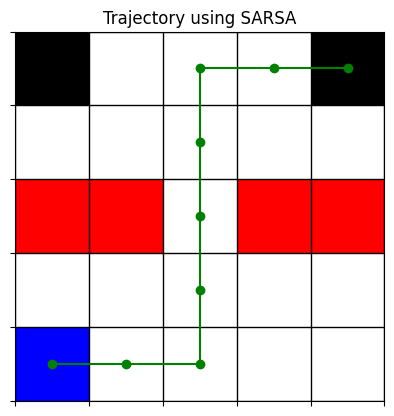

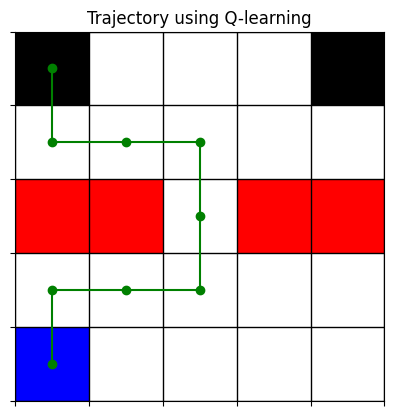

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld environment with updated positions and dimensions
class Gridworld:
    def __init__(self):
        self.grid = np.zeros((5, 5))
        self.grid[0, [0, 4]] = 1  # Terminal states (black)
        self.grid[2, [0, 1, 3, 4]] = -20  # Red states
        self.grid[4, 0] = 2  # Start state (blue)
        self.start_state = (4, 0)
        self.state = self.start_state
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 'up':
            next_state = (max(0, row - 1), col)
        elif action == 'down':
            next_state = (min(4, row + 1), col)
        elif action == 'left':
            next_state = (row, max(0, col - 1))
        elif action == 'right':
            next_state = (row, min(4, col + 1))

        if self.grid[next_state] == 1:  # Terminal state
            reward = 0
            done = True
        elif self.grid[next_state] == -20:  # Red state
            reward = -20
            next_state = self.start_state
            done = False
        else:  # Regular state
            reward = -1
            done = False

        self.state = next_state
        return next_state, reward, done

# Helper functions
def choose_action(state, q_table, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(env.actions)
    else:
        return env.actions[np.argmax(q_table[state])]

def get_state_index(state):
    return state[0] * 5 + state[1]

# SARSA algorithm
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    q_table = np.zeros((25, env.action_space))
    for episode in range(num_episodes):
        state = env.reset()
        state_idx = get_state_index(state)
        action = choose_action(state_idx, q_table, epsilon)

        while True:
            next_state, reward, done = env.step(action)
            next_state_idx = get_state_index(next_state)
            next_action = choose_action(next_state_idx, q_table, epsilon)

            q_table[state_idx][env.actions.index(action)] += alpha * (
                reward + gamma * q_table[next_state_idx][env.actions.index(next_action)] - q_table[state_idx][env.actions.index(action)]
            )

            state, action = next_state, next_action
            state_idx = next_state_idx

            if done:
                break
    return q_table

# Q-learning algorithm
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    q_table = np.zeros((25, env.action_space))
    for episode in range(num_episodes):
        state = env.reset()
        state_idx = get_state_index(state)

        while True:
            action = choose_action(state_idx, q_table, epsilon)
            next_state, reward, done = env.step(action)
            next_state_idx = get_state_index(next_state)

            q_table[state_idx][env.actions.index(action)] += alpha * (
                reward + gamma * np.max(q_table[next_state_idx]) - q_table[state_idx][env.actions.index(action)]
            )

            state = next_state
            state_idx = next_state_idx

            if done:
                break
    return q_table

# Plotting function
def plot_trajectory(env, q_table, title):
    # Set up the grid with specified colors
    grid = np.ones((5, 5, 3))  # Start with all squares white

    # Set the terminal states to black
    grid[0, 0] = [0, 0, 0]
    grid[0, 4] = [0, 0, 0]

    # Set the red squares
    red_squares = [(2, 0), (2, 1), (2, 3), (2, 4)]
    for rs in red_squares:
        grid[rs] = [1, 0, 0]  # Red

    # Set the starting square to blue
    grid[4, 0] = [0, 0, 1]  # Blue

    # Reset environment and start trajectory
    state = env.reset()
    trajectory = [state]

    while True:
        state_idx = get_state_index(state)
        action = env.actions[np.argmax(q_table[state_idx])]
        next_state, _, done = env.step(action)

        trajectory.append(next_state)
        state = next_state

        if done:
            break

    trajectory = np.array(trajectory)

    plt.imshow(grid)
    plt.plot(trajectory[:, 1], trajectory[:, 0], marker='o', color='green')  # Green line for trajectory

    # Add black grid lines
    plt.grid(which='both', color='black', linestyle='-', linewidth=1)

    # Set major ticks for grid lines
    plt.xticks(np.arange(-0.5, 5, 1), [])
    plt.yticks(np.arange(-0.5, 5, 1), [])

    plt.title(title)
    plt.show()

# Hyperparameters
num_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Create the environment
env = Gridworld()

# Train the agent using SARSA
q_table_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)

# Train the agent using Q-learning
q_table_q_learning = q_learning(env, num_episodes, alpha, gamma, epsilon)

# Plot trajectories
plot_trajectory(env, q_table_sarsa, 'Trajectory using SARSA')
plot_trajectory(env, q_table_q_learning, 'Trajectory using Q-learning')

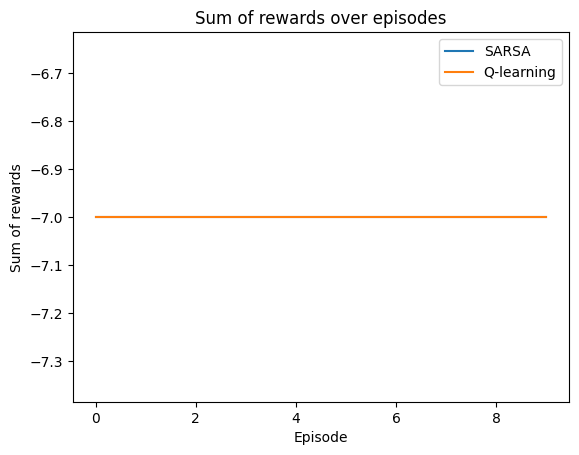

In [6]:
# Compare the sum of rewards over episodes after training
def run_episode(env, q_table):
    state = env.reset()
    total_reward = 0

    while True:
        state_idx = get_state_index(state)
        action = env.actions[np.argmax(q_table[state_idx])]
        next_state, reward, done = env.step(action)
        total_reward += reward

        state = next_state

        if done:
            break
    return total_reward

rewards_sarsa = [run_episode(env, q_table_sarsa) for _ in range(10)]
rewards_q_learning = [run_episode(env, q_table_q_learning) for _ in range(10)]

plt.plot(rewards_sarsa, label='SARSA')
plt.plot(rewards_q_learning, label='Q-learning')
plt.xlabel('Episode')
plt.ylabel('Sum of rewards')
plt.legend()
plt.title('Sum of rewards over episodes')
plt.show()


In [ ]:
# Train the agent using SARSA
q_table_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)

# Train the agent using Q-learning
q_table_q_learning = q_learning(env, num_episodes, alpha, gamma, epsilon)

In [7]:
q_table_sarsa

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [ -0.65132156,  -1.85125526,   0.        ,  -1.80213112],
       [ -1.88651488,  -2.90512855,  -1.29140766,  -1.05440638],
       [ -0.74581342,  -1.89873556,  -1.75347324,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  -7.11740354,  -0.271     ,  -0.38281488],
       [ -1.03469707, -12.25415266,  -1.33475815,  -1.83784319],
       [ -2.14728225,  -3.92192399,  -2.82021453,  -3.457274  ],
       [ -1.19222223, -14.16028943,  -2.12232139,  -1.57285557],
       [  0.        ,  -7.38344237,  -0.19330435,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ -3.25003628,  -6.25616785, -25.29535604, -27.98954874],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-21.23040789, -10

In [8]:
q_table_q_learning

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [ -0.74581342,  -1.08503803,   0.        ,  -1.25032572],
       [ -1.45371656,  -2.40191152,  -0.99999999,  -0.99999999],
       [ -0.6861894 ,  -1.32973574,  -1.38153999,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        , -12.51360316,  -0.1       ,  -0.53917323],
       [ -0.99999999, -20.88728156,  -0.99999999,  -2.24008006],
       [ -1.98999998,  -3.69191977,  -1.98999998,  -1.98999998],
       [ -0.99999999, -12.11210163,  -1.71851345,  -0.99999999],
       [  0.        , -12.30617452,  -0.93242683,  -0.19      ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ -2.97009998,  -4.56198269, -24.68489144, -24.35212447],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-17.16395169,  -7

# **Part 2**

Bellman equation solutions for exact value function

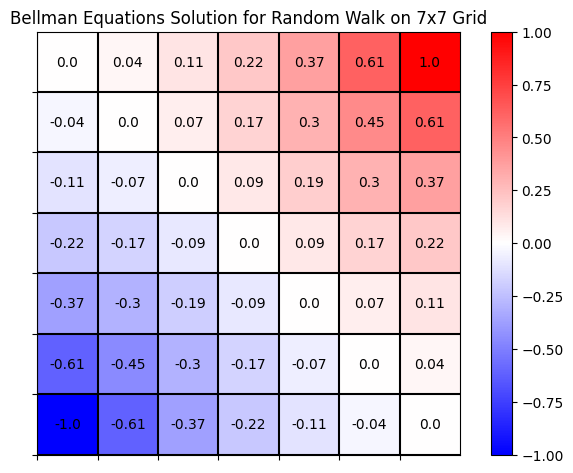

Value Function Grid:
[[ 2.22044605e-16  3.57086922e-02  1.07126077e-01  2.16758027e-01
   3.74628034e-01  6.09397024e-01  1.00000000e+00]
 [-3.57086922e-02  1.11022302e-16  6.89115114e-02  1.68519969e-01
   2.97729052e-01  4.53563038e-01  6.09397024e-01]
 [-1.07126077e-01 -6.89115114e-02  3.33066907e-16  9.06812843e-02
   1.94205168e-01  2.97729052e-01  3.74628034e-01]
 [-2.16758027e-01 -1.68519969e-01 -9.06812843e-02  2.22044605e-16
   9.06812843e-02  1.68519969e-01  2.16758027e-01]
 [-3.74628034e-01 -2.97729052e-01 -1.94205168e-01 -9.06812843e-02
   1.11022302e-16  6.89115114e-02  1.07126077e-01]
 [-6.09397024e-01 -4.53563038e-01 -2.97729052e-01 -1.68519969e-01
  -6.89115114e-02  1.11022302e-16  3.57086922e-02]
 [-1.00000000e+00 -6.09397024e-01 -3.74628034e-01 -2.16758027e-01
  -1.07126077e-01 -3.57086922e-02  1.11022302e-16]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
n = 7
num_states = n * n

# Discount factor
gamma = 1.0

# Initialize the transition probability matrix P and the reward vector R
P = np.zeros((num_states, num_states))
R = np.zeros(num_states)

# Helper function to convert 2D index to 1D
def idx(x, y):
    return x * n + y

# Define the rewards and transitions
for i in range(n):
    for j in range(n):
        state = idx(i, j)
        if (i, j) == (0, 6):  # Upper right
            R[state] = 1
            P[state, idx(0, 6)] = 0.0
        elif (i, j) == (6, 0):  # Lower left
            R[state] = -1.0
            P[state, idx(6, 0)] = 0.0
        else:
            for action in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < n and 0 <= nj < n:
                    P[state, idx(ni, nj)] += 0.25
                else:
                    P[state, idx(i, j)] += 0.25
                    R[state] -= 0.0 * 0.25  # Moving off the grid

# Compute the value function V
I = np.eye(num_states)
V = np.linalg.inv(I - gamma * P) @ R

# Reshape the value function to the grid
V_exact = V.reshape((n, n))

# Plotting the value function
fig, ax = plt.subplots()
im = ax.imshow(V_exact, cmap='bwr', extent=[0, n, 0, n])

# Loop over data dimensions and create text annotations
for i in range(n):
    for j in range(n):
        text = ax.text(j + 0.5, n - i - 0.5, round(V_exact[i, j], 2),
                       ha="center", va="center", color="black")


# Add grid lines
ax.set_xticks(np.arange(0, n, 1))
ax.set_yticks(np.arange(0, n, 1))
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Labels and title
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Bellman Equations Solution for Random Walk on 7x7 Grid")
fig.tight_layout()
plt.colorbar(im)
plt.show()

print("Value Function Grid:")
print(V_exact)

### Gradient Monte Carlo value function

Value Function:
[[ 0.00413355  0.03528173  0.10579882  0.21383363  0.3814433   0.61865436
   1.        ]
 [-0.02713987 -0.00328299  0.07292669  0.17080035  0.29785347  0.45224135
   0.61417697]
 [-0.10902256 -0.07372474 -0.0040591   0.09517164  0.19084907  0.28963685
   0.36536313]
 [-0.21659193 -0.16808209 -0.07783251  0.005       0.09943978  0.18071867
   0.22296099]
 [-0.37200274 -0.30582351 -0.19131783 -0.08391413  0.00496238  0.07034694
   0.11247059]
 [-0.6099565  -0.4525076  -0.29397075 -0.17218427 -0.0652921   0.00942776
   0.04381847]
 [-1.         -0.60673887 -0.37115732 -0.21933751 -0.11164009 -0.02040816
   0.00917431]]


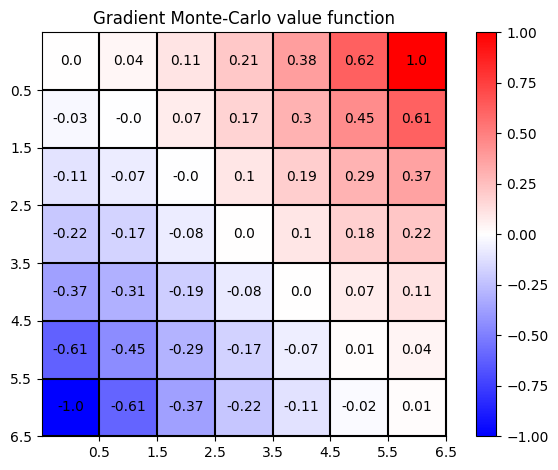

In [ ]:
import numpy as np

# Constants
GRID_SIZE = 7
TERMINAL_STATES = {(6, 0): -1, (0, 6): 1}
ACTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
ALPHA = 0.01  # Learning rate
GAMMA = 1.0  # Discount factor
EPISODES = 10000

# Helper functions
def is_terminal(state):
    return state in TERMINAL_STATES

def step(state, action):
    x, y = state
    dx, dy = action
    new_state = (x + dx, y + dy)

    if new_state in TERMINAL_STATES:
        return new_state, TERMINAL_STATES[new_state]

    if 0 <= new_state[0] < GRID_SIZE and 0 <= new_state[1] < GRID_SIZE:
        return new_state, 0

    return state, 0

# Initialize value function
V_mc = np.zeros((GRID_SIZE, GRID_SIZE))
returns_sum = np.zeros((GRID_SIZE, GRID_SIZE))
returns_count = np.zeros((GRID_SIZE, GRID_SIZE))

def generate_episode():
    episode = []
    state = (GRID_SIZE // 2, GRID_SIZE // 2)  # Start at the center

    while 1==1:
        if is_terminal(state):
            break
        action = ACTIONS[np.random.choice(len(ACTIONS))]
        next_state, reward = step(state, action)
        episode.append((state, reward))
        state = next_state

    episode.append((state, 0))  # Append the terminal state with reward 0
    return episode

def monte_carlo():
    global V_mc, returns_sum, returns_count
    for episode_num in range(EPISODES):
        episode = generate_episode()
        G = 0
        for t in range(len(episode) - 1, -1, -1):
            state, reward = episode[t]
            G = GAMMA * G + reward
            if state not in [x[0] for x in episode[:t]]:
                returns_sum[state] += G
                returns_count[state] += 1.0
                V_mc[state] = returns_sum[state] / returns_count[state]

# Run the Monte Carlo algorithm
monte_carlo()

# Print the resulting value function
print("Value Function:")
V_mc[0][6] = 1
V_mc[6][0] = -1
print(V_mc)


def plot_values(V, title):
        fig, ax = plt.subplots()
        im = ax.imshow(V, cmap='bwr')

        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                text = ax.text(j, i, round(V[i, j], 2),
                               ha="center", va="center", color="k")

                # Add grid lines
        ax.set_xticks(np.arange(0.5, n, 1))
        ax.set_yticks(np.arange(0.5, n, 1))
        ax.grid(color='black', linestyle='-', linewidth=1.5)

        ax.set_title(title)
        fig.tight_layout()
        plt.colorbar(im)
        plt.show()

plot_values(V_mc, "Gradient Monte-Carlo value function")

### Semi-TD(0)

Estimated Value Function:
[[-0.00809966  0.02919396  0.0959923   0.18940422  0.34978039  0.59324697
   1.        ]
 [-0.04200211 -0.00536444  0.06036968  0.15900632  0.29066506  0.43857482
   0.59117945]
 [-0.13506373 -0.08167812 -0.00377117  0.09388617  0.19327388  0.28015368
   0.36217025]
 [-0.23296315 -0.18331625 -0.11475133 -0.01369249  0.09563457  0.17182719
   0.2173397 ]
 [-0.39912433 -0.30303193 -0.19876096 -0.09363958  0.00406345  0.07549982
   0.11582036]
 [-0.63633836 -0.44478407 -0.29449824 -0.17039696 -0.06846005 -0.0010222
   0.03734631]
 [-1.         -0.57002391 -0.37198528 -0.23198002 -0.10358119 -0.03792775
  -0.00172431]]


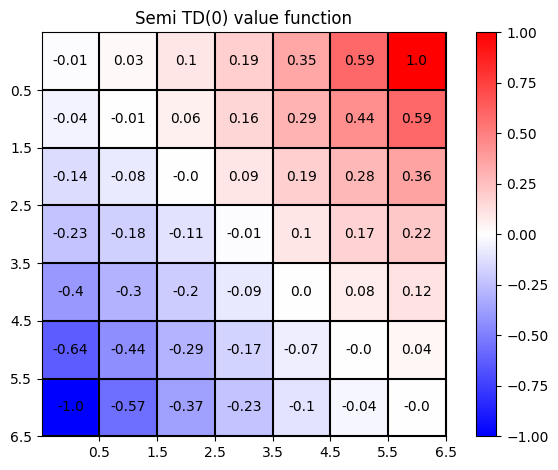

In [ ]:
import numpy as np

# Define the grid size
GRID_SIZE = 7

# Define the terminal states and rewards
TERMINAL_STATES = {(6, 0): -1, (0, 6): 1}
START_STATE = (3, 3)
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_PROBS = 1 / len(ACTIONS)

# Define the feature vector for a given state (using a simple identity feature vector)
def get_feature_vector(state):
    feature_vector = np.zeros(GRID_SIZE * GRID_SIZE)
    feature_vector[state[0] * GRID_SIZE + state[1]] = 1
    return feature_vector

# Define the transition function
def take_action(state, action):
    if state in TERMINAL_STATES:
        return state, TERMINAL_STATES[state]

    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, GRID_SIZE - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, GRID_SIZE - 1)

    next_state = (x, y)
    reward = TERMINAL_STATES.get(next_state, 0)

    return next_state, reward

# Semi-gradient TD(0) function
def semi_gradient_td_0(num_episodes, alpha):
    num_features = GRID_SIZE * GRID_SIZE
    weights = np.zeros(num_features)

    for episode in range(num_episodes):
        state = START_STATE
        while state:
            if state in TERMINAL_STATES:
                break
            action = np.random.choice(ACTIONS)
            next_state, reward = take_action(state, action)

            state_feature = get_feature_vector(state)
            next_state_feature = get_feature_vector(next_state)

            td_target = reward + np.dot(weights, next_state_feature)
            td_error = td_target - np.dot(weights, state_feature)

            weights += alpha * td_error * state_feature
            state = next_state

    return weights

# Define the parameters
NUM_EPISODES = 10000
ALPHA = 0.01

# Train the model
weights = semi_gradient_td_0(NUM_EPISODES, ALPHA)


# Print the estimated value function
V_td = weights.reshape((GRID_SIZE, GRID_SIZE))
V_td[0][6] = 1
V_td[6][0] = -1
print("Estimated Value Function:")
print(V_td)

def plot_values(V, title):
        fig, ax = plt.subplots()
        im = ax.imshow(V, cmap='bwr')

        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                text = ax.text(j, i, round(V[i, j], 2),
                               ha="center", va="center", color="k")

        # Add grid lines
        ax.set_xticks(np.arange(0.5, n, 1))
        ax.set_yticks(np.arange(0.5, n, 1))
        ax.grid(color='black', linestyle='-', linewidth=1.5)

        ax.set_title(title)
        fig.tight_layout()
        plt.colorbar(im)
        plt.show()

plot_values(V_td, "Semi TD(0) value function")

## Comparison using RMSE

Exact value function:
[[ 2.22044605e-16  3.57086922e-02  1.07126077e-01  2.16758027e-01
   3.74628034e-01  6.09397024e-01  1.00000000e+00]
 [-3.57086922e-02  1.11022302e-16  6.89115114e-02  1.68519969e-01
   2.97729052e-01  4.53563038e-01  6.09397024e-01]
 [-1.07126077e-01 -6.89115114e-02  3.33066907e-16  9.06812843e-02
   1.94205168e-01  2.97729052e-01  3.74628034e-01]
 [-2.16758027e-01 -1.68519969e-01 -9.06812843e-02  2.22044605e-16
   9.06812843e-02  1.68519969e-01  2.16758027e-01]
 [-3.74628034e-01 -2.97729052e-01 -1.94205168e-01 -9.06812843e-02
   1.11022302e-16  6.89115114e-02  1.07126077e-01]
 [-6.09397024e-01 -4.53563038e-01 -2.97729052e-01 -1.68519969e-01
  -6.89115114e-02  1.11022302e-16  3.57086922e-02]
 [-1.00000000e+00 -6.09397024e-01 -3.74628034e-01 -2.16758027e-01
  -1.07126077e-01 -3.57086922e-02  1.11022302e-16]]

Value function obtained from Monte Carlo:
[[ 0.00413355  0.03528173  0.10579882  0.21383363  0.3814433   0.61865436
   1.        ]
 [-0.02713987 -0.00328299 

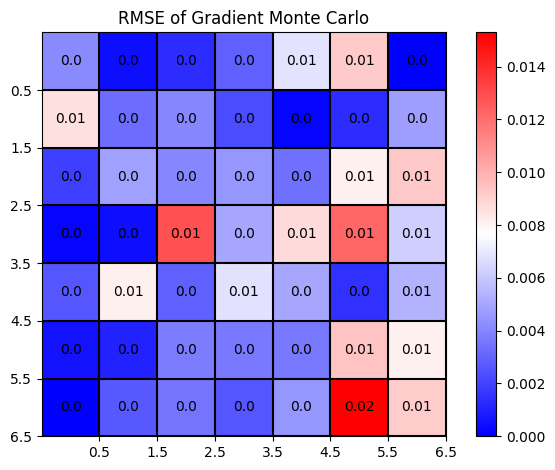

In [ ]:
# Compute RMSE for each cell
RMSE_mc = np.sqrt((V_exact - V_mc) ** 2)

print("Exact value function:")
print(V_exact)
print("\nValue function obtained from Monte Carlo:")
print(V_mc)
print("\nRMSE for each cell:")
print(RMSE_mc)

plot_values(RMSE_mc, "RMSE of Gradient Monte Carlo")

Exact value function:
[[ 2.22044605e-16  3.57086922e-02  1.07126077e-01  2.16758027e-01
   3.74628034e-01  6.09397024e-01  1.00000000e+00]
 [-3.57086922e-02  1.11022302e-16  6.89115114e-02  1.68519969e-01
   2.97729052e-01  4.53563038e-01  6.09397024e-01]
 [-1.07126077e-01 -6.89115114e-02  3.33066907e-16  9.06812843e-02
   1.94205168e-01  2.97729052e-01  3.74628034e-01]
 [-2.16758027e-01 -1.68519969e-01 -9.06812843e-02  2.22044605e-16
   9.06812843e-02  1.68519969e-01  2.16758027e-01]
 [-3.74628034e-01 -2.97729052e-01 -1.94205168e-01 -9.06812843e-02
   1.11022302e-16  6.89115114e-02  1.07126077e-01]
 [-6.09397024e-01 -4.53563038e-01 -2.97729052e-01 -1.68519969e-01
  -6.89115114e-02  1.11022302e-16  3.57086922e-02]
 [-1.00000000e+00 -6.09397024e-01 -3.74628034e-01 -2.16758027e-01
  -1.07126077e-01 -3.57086922e-02  1.11022302e-16]]

Value function obtained from Monte Carlo:
[[-0.00809966  0.02919396  0.0959923   0.18940422  0.34978039  0.59324697
   1.        ]
 [-0.04200211 -0.00536444 

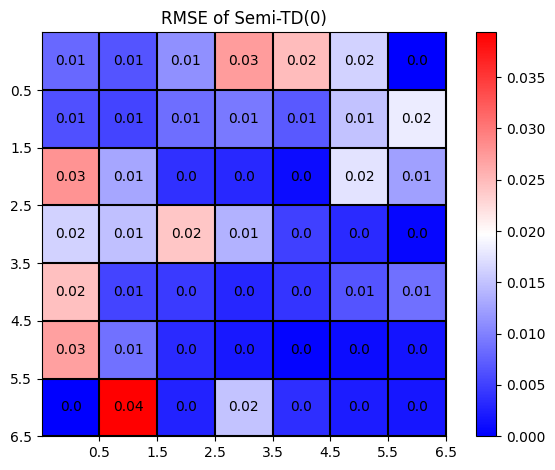

In [ ]:
# Compute RMSE for each cell
RMSE_td = np.sqrt((V_exact - V_td) ** 2)

print("Exact value function:")
print(V_exact)
print("\nValue function obtained from Monte Carlo:")
print(V_td)
print("\nRMSE for each cell:")
print(RMSE_td)

plot_values(RMSE_td, "RMSE of Semi-TD(0)")